Universidad del Valle de Guatemala
# Laboratorio 7
## Análisis de redes sociales

Daniel Valdez - 21240

Emilio Solano - 21212

In [1]:
import json
import pandas as pd
import re
from nltk.corpus import stopwords
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import networkx as nx


### Carga de datos

In [2]:
traficogt_data = []
with open('traficogt.txt', 'r', encoding='utf-16') as f:
    for line_number, line in enumerate(f, start=1):
        try:
            traficogt_data.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Se omitió la línea {line_number} debido a un error de decodificación.")

print("Cantidad de entradas en traficogt:", len(traficogt_data))
print("Primera entrada de traficogt:", traficogt_data[0] if traficogt_data else "Sin datos")

Se omitió la línea 5605 debido a un error de decodificación.
Cantidad de entradas en traficogt: 5604
Primera entrada de traficogt: {'id': 1834236045598056867, 'id_str': '1834236045598056867', 'url': 'https://x.com/traficogt/status/1834236045598056867', 'date': '2024-09-12 14:22:06+00:00', 'user': {'id': 93938886, 'id_str': '93938886', 'url': 'https://x.com/traficogt', 'username': 'traficogt', 'displayname': 'traficoGT', 'rawDescription': 'Noticias de ciudad de Guatemala', 'created': '2009-12-01 20:42:19+00:00', 'followersCount': 314368, 'friendsCount': 137, 'statusesCount': 52385, 'favouritesCount': 3471, 'listedCount': 291, 'mediaCount': 1292, 'location': 'Guatemala', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1782036597841530880/-tVuhOdK_normal.jpg', 'profileBannerUrl': None, 'protected': None, 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': [], 'pinnedIds': [], '_type': 'snscrape.modules.twitter.User'}, 'lang': 'es', 'rawContent': 'Es comprensib

In [3]:
tioberny_data = []
with open('tioberny.txt', 'r', encoding='utf-16') as f:
    for line_number, line in enumerate(f, start=1):
        try:
            tioberny_data.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Se omitió la línea {line_number} debido a un error de decodificación.")

print("Cantidad de entradas en tioberny:", len(tioberny_data))
print("Primera entrada de tioberny:", tioberny_data[0] if tioberny_data else "Sin datos")

Se omitió la línea 191 debido a un error de decodificación.
Se omitió la línea 370 debido a un error de decodificación.
Se omitió la línea 558 debido a un error de decodificación.
Cantidad de entradas en tioberny: 5383
Primera entrada de tioberny: {'id': 1834281080029110288, 'id_str': '1834281080029110288', 'url': 'https://x.com/La_ReVoluZzion/status/1834281080029110288', 'date': '2024-09-12 17:21:03+00:00', 'user': {'id': 1435062946598694914, 'id_str': '1435062946598694914', 'url': 'https://x.com/La_ReVoluZzion', 'username': 'La_ReVoluZzion', 'displayname': 'The_ReVoluZZzioN \U0001fae1', 'rawDescription': '¡Defensor de los defensores de los DDHH, PRO-LGBTIXXX🏳️\u200d🌈 y demás sub especies!', 'created': '2021-09-07 02:11:21+00:00', 'followersCount': 2102, 'friendsCount': 531, 'statusesCount': 51984, 'favouritesCount': 143086, 'listedCount': 7, 'mediaCount': 18100, 'location': 'Cuba 🇨🇺', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1741646608679268353/M8PgJYKR_normal.jpg', '

### Análisis de tweets

In [4]:
def analyze_tweets(data, source_name):
    print(f"\nAnálisis de tweets de {source_name}:")
    print(f"Cantidad de entradas: {len(data)}")

    if data:
        print("Ejemplos de contenido de tweets:")
        for tweet in data[:5]:  # Muestra los primeros 5 tweets
            print(f"User: {tweet['user']['username']} | Tweet: {tweet['rawContent']}\n")

In [5]:
analyze_tweets(traficogt_data, "traficogt")


Análisis de tweets de traficogt:
Cantidad de entradas: 5604
Ejemplos de contenido de tweets:
User: traficogt | Tweet: Es comprensible la resolución... El ruso sabe de engrasar maquinaria.

User: monymmorales | Tweet: La corrupción de la @CC_Guatemala
es descarada, falsificación de documentos y obligaron a extenderles DPI.
https://t.co/0J24ZCXJ2c

User: animaldgalaccia | Tweet: @PNCdeGuatemala @mingobguate @FJimenezmingob @diegoedeleon @amilcarmontejo @traficogt 

🚨🚨🚨🚨🚨

User: EstacionDobleA | Tweet: @amilcarmontejo @AztecaNoticiaGT @BancadaSemilla @BArevalodeLeon @diputadojp @EmisorasUnidas @eP_investiga @ImpactoNoticiGT @lahoragt @mingobguate @PrensaComunitar @Transito_mixco @DGTguate @PMT_VILLANUEVA @InfoTransitoGt @traficogt @PMT_SanJuanSac @PMTSanLucasSac @YenerPlaza

User: CubReserva | Tweet: @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEMPAGUA @muniguate @GuatemalaGob @Guatevision_tv @pattyo502 @karinapazGt @Josechic86 @vecinosz16 URGENTE zona 16 en deterioro por  tala inmoderada

In [6]:
analyze_tweets(tioberny_data, "tioberny")


Análisis de tweets de tioberny:
Cantidad de entradas: 5383
Ejemplos de contenido de tweets:
User: La_ReVoluZzion | Tweet: _
Confirmado Compañeres,

El impuesto por la @usembassyguate,
—Solo cuenta con el pagado apoyo de los @48CantonesToto a través de la @USAIDGuate y @UEGuatemala

@BArevalodeLeon huye y se esconde del Verdadero Pueblo Guatemalteco.

User: XelaNewsGt | Tweet: #URGENTE Lo que los medios #faferos no informaron ayer, acerca de la visita del presidente #BernardoArévalo a #NebajQuiché, donde fue sacado a toda prisa por #SAAS ya que  manifestantes pedían ser escuchados por el mandatario, quien decidió huir de esta manera.
#XelaNews 🇫🇷 https://t.co/UQQbnvlfTa

User: M24095273 | Tweet: @IvanDuque @BArevalodeLeon Con que usaste PEGASUS para espiar a tus detractores! obra de un narcisista sin conciencia, buena pinta por fuera corazon negro y podrido por dentro sin alma

User: carlosalbesc | Tweet: @IvanDuque @BArevalodeLeon Entre Ellos se entienden bien, y sÍ están  cuadrando u

### De JSON a DF

In [7]:
traficdf = pd.DataFrame(traficogt_data)

In [8]:
bernydf = pd.DataFrame(tioberny_data)

In [9]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,Es comprensible la resolución... El ruso sabe ...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,La corrupción de la @CC_Guatemala\nes descarad...,0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,@PNCdeGuatemala @mingobguate @FJimenezmingob @...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,@amilcarmontejo @AztecaNoticiaGT @BancadaSemil...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,@soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


In [10]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


In [11]:
traficdf['rawContent'].tail()

,rawContent
5599,@traficogt Y no que presentando 5 mil firmas a...
5600,@hshetemul @traficogt Y de igual Manera quitan...
5601,@traficogt Es algo más fuerte que ellos no qui...
5602,@Factor4_GT @traficogt @CC_Guatemala @MPguatem...
5603,@AgenciaOcote @traficogt Vieja ignorante


In [12]:
bernydf['rawContent'].tail()

,rawContent
5378,@marvgcaceres @diaco_gt @GuatemalaGob @vinicio...
5379,@Soygeorgegt Lastima @BArevalodeLeon la gente ...
5380,Alguien sabe si este precio es culpa de @BArev...
5381,@guate_opina @BArevalodeLeon Y los diputados p...
5382,@ElQueNews @BArevalodeLeon @lucreciapeinado @F...


### Limpieza y Preprocesamiento de Datos

#### Preprocesamiento

##### Conversión de texto

In [13]:
traficdf['rawContent'] = traficdf['rawContent'].str.lower()
bernydf['rawContent'] = bernydf['rawContent'].str.lower()

In [14]:
traficdf['rawContent'].tail()

,rawContent
5599,@traficogt y no que presentando 5 mil firmas a...
5600,@hshetemul @traficogt y de igual manera quitan...
5601,@traficogt es algo más fuerte que ellos no qui...
5602,@factor4_gt @traficogt @cc_guatemala @mpguatem...
5603,@agenciaocote @traficogt vieja ignorante


In [15]:
bernydf['rawContent'].tail()

,rawContent
5378,@marvgcaceres @diaco_gt @guatemalagob @vinicio...
5379,@soygeorgegt lastima @barevalodeleon la gente ...
5380,alguien sabe si este precio es culpa de @barev...
5381,@guate_opina @barevalodeleon y los diputados p...
5382,@elquenews @barevalodeleon @lucreciapeinado @f...


##### Eliminación de caracteres especiales

In [16]:
# Create a column with hashtags
traficdf["hashtags"]


,hashtags
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
5599,[]
5600,[]
5601,[]
5602,[]


In [17]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'[@#\'“”]', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'[@#\'“”]', '', regex=True)

In [18]:
traficdf['rawContent'].tail()

,rawContent
5599,traficogt y no que presentando 5 mil firmas an...
5600,hshetemul traficogt y de igual manera quitan e...
5601,traficogt es algo más fuerte que ellos no quie...
5602,factor4_gt traficogt cc_guatemala mpguatemala ...
5603,agenciaocote traficogt vieja ignorante


In [19]:
bernydf['rawContent'].tail()

,rawContent
5378,marvgcaceres diaco_gt guatemalagob vinicioguti...
5379,soygeorgegt lastima barevalodeleon la gente qu...
5380,alguien sabe si este precio es culpa de bareva...
5381,guate_opina barevalodeleon y los diputados pid...
5382,elquenews barevalodeleon lucreciapeinado fjime...


##### Eliminación de URLs

In [20]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)

#####   Eliminación de signos de puntuación

In [21]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'[!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True)

##### Eliminación de Stopwords

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('spanish'))

traficdf['rawContent'] = traficdf['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
bernydf['rawContent'] = bernydf['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

##### Eliminación de números

In [24]:
traficdf['rawContent'] = traficdf['rawContent'].str.replace(r'\d+', '', regex=True)
bernydf['rawContent'] = bernydf['rawContent'].str.replace(r'\d+', '', regex=True)

##### Verificación de DataFrames

In [25]:
traficdf['rawContent'].tail()

,rawContent
5599,traficogt presentando mil firmas congrueso ra...
5600,hshetemul traficogt igual manera quitan derech...
5601,traficogt fuerte quieren sepa renuncian
5602,factor_gt traficogt cc_guatemala mpguatemala
5603,agenciaocote traficogt vieja ignorante


In [26]:
bernydf['rawContent'].tail()

,rawContent
5378,marvgcaceres diaco_gt guatemalagob vinicioguti...
5379,soygeorgegt lastima barevalodeleon gente rodea...
5380,alguien sabe si precio culpa barevalodeleon ??
5381,guate_opina barevalodeleon diputados pidiendo ...
5382,elquenews barevalodeleon lucreciapeinado fjime...


In [27]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,comprensible resolución... ruso sabe engrasar ...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,"corrupción cc_guatemala descarada, falsificaci...",0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,pncdeguatemala mingobguate fjimenezmingob dieg...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,amilcarmontejo aztecanoticiagt bancadasemilla ...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,soy_ aztecanoticiagt conapgt denunciaempagua m...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


In [28]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_ confirmado compañeres, impuesto usembassygua...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,"urgente medios faferos informaron ayer, acerca...",12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,ivanduque barevalodeleon usaste pegasus espiar...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,"ivanduque barevalodeleon entienden bien, cuadr...",0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,presidente barevalodeleon vicepresidenta karin...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


#### Extracción de relaciones

In [29]:
bernyInteractions = bernydf[['user', 'mentionedUsers', 'retweetCount', "hashtags"]]
traficInteractions = traficdf[['user', 'mentionedUsers', 'retweetCount', 'hashtags']]

In [30]:
interactions = pd.concat([bernyInteractions, traficInteractions])

In [31]:
interactions

,user,mentionedUsers,retweetCount,hashtags
0,"{'id': 1435062946598694914, 'id_str': '1435062...","[{'id': 23664866, 'id_str': '23664866', 'usern...",0,[]
1,"{'id': 956650778634145792, 'id_str': '95665077...",[],80,"[URGENTE, faferos, BernardoArévalo, NebajQuich..."
2,"{'id': 1087057038755143680, 'id_str': '1087057...","[{'id': 77653794, 'id_str': '77653794', 'usern...",0,[]
3,"{'id': 2881001877, 'id_str': '2881001877', 'ur...","[{'id': 77653794, 'id_str': '77653794', 'usern...",0,[]
4,"{'id': 3013862206, 'id_str': '3013862206', 'ur...","[{'id': 945378369818058752, 'id_str': '9453783...",0,[]
...,...,...,...,...
5599,"{'id': 27352856, 'id_str': '27352856', 'url': ...","[{'id': 93938886, 'id_str': '93938886', 'usern...",0,[]
5600,"{'id': 591424023, 'id_str': '591424023', 'url'...","[{'id': 633615711, 'id_str': '633615711', 'use...",0,[]
5601,"{'id': 1572301195032625152, 'id_str': '1572301...","[{'id': 93938886, 'id_str': '93938886', 'usern...",0,[]
5602,"{'id': 591424023, 'id_str': '591424023', 'url'...","[{'id': 1241496971678015489, 'id_str': '124149...",0,[]


In [32]:
interactions['user']

,user
0,"{'id': 1435062946598694914, 'id_str': '1435062..."
1,"{'id': 956650778634145792, 'id_str': '95665077..."
2,"{'id': 1087057038755143680, 'id_str': '1087057..."
3,"{'id': 2881001877, 'id_str': '2881001877', 'ur..."
4,"{'id': 3013862206, 'id_str': '3013862206', 'ur..."
...,...
5599,"{'id': 27352856, 'id_str': '27352856', 'url': ..."
5600,"{'id': 591424023, 'id_str': '591424023', 'url'..."
5601,"{'id': 1572301195032625152, 'id_str': '1572301..."
5602,"{'id': 591424023, 'id_str': '591424023', 'url'..."


In [33]:
interactions['user'].iloc[0].keys()

dict_keys(['id', 'id_str', 'url', 'username', 'displayname', 'rawDescription', 'created', 'followersCount', 'friendsCount', 'statusesCount', 'favouritesCount', 'listedCount', 'mediaCount', 'location', 'profileImageUrl', 'profileBannerUrl', 'protected', 'verified', 'blue', 'blueType', 'descriptionLinks', 'pinnedIds', '_type'])

#### Normalización y limpieza de duplicados

In [34]:
interactions['user'] = interactions['user'].apply(lambda x: x['username'] if isinstance(x, dict) and 'username' in x else None)

interactions['user'] = interactions['user'].str.lower()

# Normalizar nombres mencionados en la columna 'mentionedUsers'
interactions['mentionedUsers'] = interactions['mentionedUsers'].apply(lambda x: [user['username'].lower() for user in x] if isinstance(x, list) else [])


In [35]:
interactions

,user,mentionedUsers,retweetCount,hashtags
0,la_revoluzzion,"[usembassyguate, 48cantonestoto, usaidguate, u...",0,[]
1,xelanewsgt,[],80,"[URGENTE, faferos, BernardoArévalo, NebajQuich..."
2,m24095273,"[ivanduque, barevalodeleon]",0,[]
3,carlosalbesc,"[ivanduque, barevalodeleon]",0,[]
4,brenda_agn,"[barevalodeleon, karinherreravp, agn_noticias,...",0,[]
...,...,...,...,...
5599,guiselabarrios,[traficogt],0,[]
5600,mvtrooper,"[hshetemul, traficogt, mpguatemala, cangguatem...",0,[]
5601,elmeronene1,[traficogt],0,[]
5602,mvtrooper,"[factor4_gt, traficogt, cc_guatemala, mpguatem...",0,[]


#### Estructura de Datos para Análisis de Redes

In [36]:
# Supongamos que `interactions` tiene las columnas ['user', 'mentionedUsers', 'retweetCount']
edges = []
for _, row in interactions.iterrows():
    user = row['user']
    for mention in row['mentionedUsers']:
        edges.append((user, mention, row['retweetCount'], row['hashtags']))

edgesdf = pd.DataFrame(edges, columns=['source', 'target', 'retweetCount', 'hashtags'])


In [37]:
edgesdf.to_csv("edges.csv")

In [38]:
interactions.to_csv("interactions.csv")

In [39]:
traficdf.to_csv("trafic.csv")

In [40]:
bernydf.to_csv("berny.csv")

### Análisis exploratorio

#### @traficogt

In [41]:
traficdf = pd.read_csv('trafic.csv', index_col=0)

In [42]:
traficdf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,comprensible resolución... ruso sabe engrasar ...,0,0,1,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,"corrupción cc_guatemala descarada, falsificaci...",0,56,84,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,pncdeguatemala mingobguate fjimenezmingob dieg...,0,0,1,...,NaN,NaN,NaN,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,amilcarmontejo aztecanoticiagt bancadasemilla ...,0,0,0,...,NaN,1.833964e+18,1.833964e+18,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,soy_ aztecanoticiagt conapgt denunciaempagua m...,0,0,1,...,NaN,1.833664e+18,1.833664e+18,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet


##### Número total de Tweets

In [43]:
numTweets = len(traficdf)
print(f'Número total de tweets: {numTweets}')

Número total de tweets: 5604


##### Número de usuarios únicos

In [44]:
traficdf['username'] = traficdf['user'].apply(lambda x: ast.literal_eval(x)['username'])

# Contar usuarios únicos
uniques = traficdf['username'].nunique()
print(f'Número de usuarios únicos: {uniques}')


Número de usuarios únicos: 2071


##### Hashtags más frecuentes


In [45]:
traficdf['hashtags'] = traficdf['hashtags'].apply(lambda x: ast.literal_eval(x))

allHashtags = [hashtag for sublist in traficdf['hashtags'] for hashtag in sublist]

from collections import Counter
hashtagsFreq = Counter(allHashtags)

# Mostrar los 10 hashtags más comunes
print(hashtagsFreq.most_common(10))


[('AhoraLH', 18), ('AHORA', 18), ('Guatemala', 16), ('RenuncienGolpistas', 13), ('URGENTE', 10), ('guatemala', 9), ('ParoNacionalIndefinido', 9), ('Ahora', 8), ('LaHoraDeActualizarnos', 8), ('GuateResiste', 8)]


##### Nube de palabras de los tweets

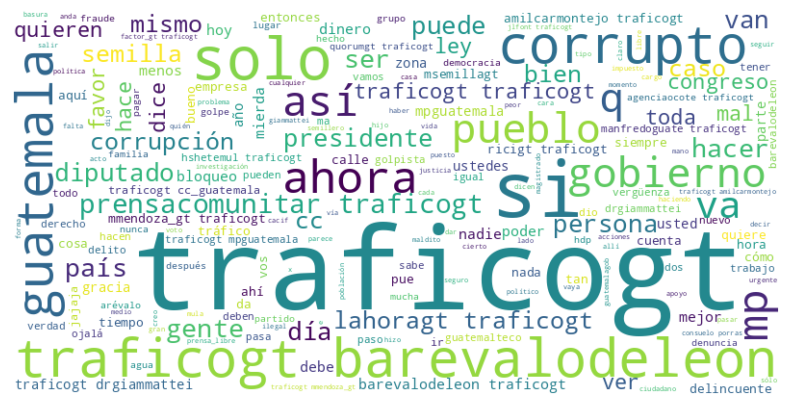

In [46]:
# Crear una cadena con todo el contenido de los tweets
allText = " ".join(tweet for tweet in traficdf['rawContent'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(allText)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### ¿Cómo se distribuyen los tweets en el tiempo? ¿Hay picos de actividad en ciertos días u horas?


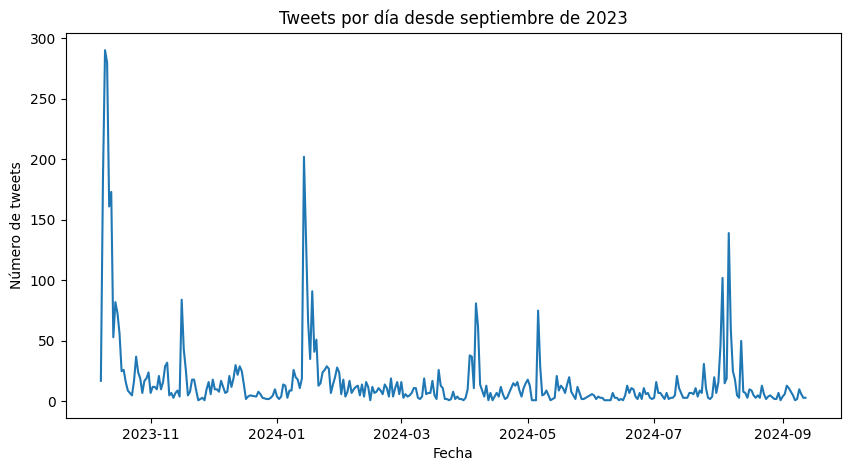

In [47]:
traficdf['date'] = pd.to_datetime(traficdf['date'])

date0 = '2023-09-01'
filtered_df = traficdf[traficdf['date'] >= date0]

filtered_df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 5), title='Tweets por día desde septiembre de 2023')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.show()


##### ¿Cuáles son los usuarios más mencionados y cómo interactúan con otros usuarios?

In [48]:
# Extraer los usuarios mencionados
traficdf['mentionedUsers'] = traficdf['mentionedUsers'].apply(lambda x: ast.literal_eval(x))

# Contar las menciones de usuarios
mentions = [user['username'] for sublist in traficdf['mentionedUsers'] for user in sublist]
mencionsFreq = Counter(mentions)

# Mostrar las 10 menciones más comunes
print(mencionsFreq.most_common(10))

[('traficogt', 4243), ('BArevalodeLeon', 432), ('DrGiammattei', 174), ('amilcarmontejo', 166), ('PrensaComunitar', 162), ('MPguatemala', 138), ('mmendoza_GT', 132), ('lahoragt', 128), ('CC_Guatemala', 110), ('muniguate', 99)]


#### @BArevalodeLeon

In [49]:
bernydf = pd.read_csv('berny.csv', index_col=0)

In [50]:
bernydf.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_ confirmado compañeres, impuesto usembassygua...",0,0,0,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,"urgente medios faferos informaron ayer, acerca...",12,80,142,...,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",NaN,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,ivanduque barevalodeleon usaste pegasus espiar...,0,0,0,...,NaN,1.834197e+18,1.834197e+18,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,"ivanduque barevalodeleon entienden bien, cuadr...",0,0,0,...,NaN,1.834197e+18,1.834197e+18,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",NaN,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,presidente barevalodeleon vicepresidenta karin...,0,0,0,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,NaN,snscrape.modules.twitter.Tweet


In [51]:
bernydf.describe()

,id,id_str,replyCount,retweetCount,likeCount,quoteCount,bookmarkedCount,conversationId,conversationIdStr,viewCount,retweetedTweet,coordinates,inReplyToTweetId,inReplyToTweetIdStr
count,5.383000e+03,5.383000e+03,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,5.383000e+03,5.383000e+03,5.291000e+03,0.0,0.0,4.566000e+03,4.566000e+03
mean,1.832976e+18,1.832976e+18,7.994427,22.319339,110.770017,1.984953,4.792681,1.832434e+18,1.832434e+18,6.348222e+03,NaN,NaN,1.832976e+18,1.832976e+18
std,2.081846e+16,2.081846e+16,124.927033,283.698585,1885.344934,30.979152,107.740521,2.261525e+16,2.261525e+16,1.469048e+05,NaN,NaN,9.649132e+15,9.649132e+15
min,8.094212e+17,8.094212e+17,0.000000,0.000000,0.000000,0.000000,0.000000,8.094212e+17,8.094212e+17,1.000000e+00,NaN,NaN,1.257873e+18,1.257873e+18
25%,1.833232e+18,1.833232e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.832977e+18,1.832977e+18,8.000000e+00,NaN,NaN,1.832977e+18,1.832977e+18
50%,1.833620e+18,1.833620e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.833493e+18,1.833493e+18,2.400000e+01,NaN,NaN,1.833493e+18,1.833493e+18
75%,1.833964e+18,1.833964e+18,0.000000,0.000000,2.000000,0.000000,0.000000,1.833734e+18,1.833734e+18,8.500000e+01,NaN,NaN,1.833734e+18,1.833734e+18
max,1.834281e+18,1.834281e+18,4783.000000,8307.000000,67416.000000,1336.000000,5277.000000,1.834281e+18,1.834281e+18,8.495723e+06,NaN,NaN,1.834279e+18,1.834279e+18


In [52]:
bernydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5383 entries, 0 to 5382
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5383 non-null   int64  
 1   id_str               5383 non-null   int64  
 2   url                  5383 non-null   object 
 3   date                 5383 non-null   object 
 4   user                 5383 non-null   object 
 5   lang                 5383 non-null   object 
 6   rawContent           5380 non-null   object 
 7   replyCount           5383 non-null   int64  
 8   retweetCount         5383 non-null   int64  
 9   likeCount            5383 non-null   int64  
 10  quoteCount           5383 non-null   int64  
 11  bookmarkedCount      5383 non-null   int64  
 12  conversationId       5383 non-null   int64  
 13  conversationIdStr    5383 non-null   int64  
 14  hashtags             5383 non-null   object 
 15  cashtags             5383 non-null   object

##### Menciones y hashtags más frecuentes

In [53]:
bernydf['mentionedUsers'] = bernydf['mentionedUsers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
allMentions = [mention['username'] for mentions in bernydf['mentionedUsers'] for mention in mentions]
mentionCounts = Counter(allMentions)

# Extraer hashtags
bernydf['hashtags'] = bernydf['hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
allHashtags = [hashtag for hashtags in bernydf['hashtags'] for hashtag in hashtags]
hashtagCounts = Counter(allHashtags)

# Mostrar las menciones y hashtags más frecuentes
print("Top 10 menciones más frecuentes:")
print(mentionCounts.most_common(10))

print("\nTop 10 hashtags más frecuentes:")
print(hashtagCounts.most_common(10))

Top 10 menciones más frecuentes:
[('BArevalodeLeon', 5169), ('GuatemalaGob', 963), ('UbaldoMacu', 587), ('santipalomov', 542), ('MPguatemala', 479), ('FJimenezmingob', 438), ('mingobguate', 317), ('__VaderTG', 291), ('CongresoGuate', 275), ('DiariodeCA', 245)]

Top 10 hashtags más frecuentes:
[('URGENTE', 33), ('GuatemalaSaleAdelante', 26), ('Guatemala', 19), ('MinfinSaleAdelante', 18), ('Presupuesto2025', 16), ('UnPresupuestoParaLaPoblación', 14), ('ElEstor', 14), ('EnElPaísDCA', 12), ('XelaNews', 8), ('NacionalesAGN', 8)]


<ipython-input-54-6c36a04ac5d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mentionValues, y=mentionLabels, palette="Blues_d")


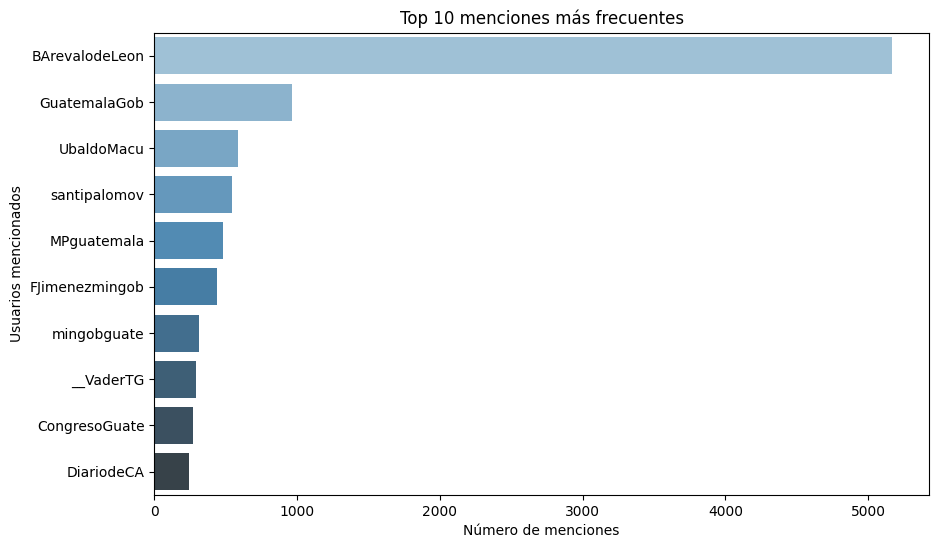

In [54]:
topMentions = mentionCounts.most_common(10)
mentionLabels, mentionValues = zip(*topMentions)

plt.figure(figsize=(10, 6))
sns.barplot(x=mentionValues, y=mentionLabels, palette="Blues_d")
plt.title('Top 10 menciones más frecuentes')
plt.xlabel('Número de menciones')
plt.ylabel('Usuarios mencionados')
plt.show()

<ipython-input-55-d91104f08023>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtagValues, y=hashtagLabels, palette="Greens_d")


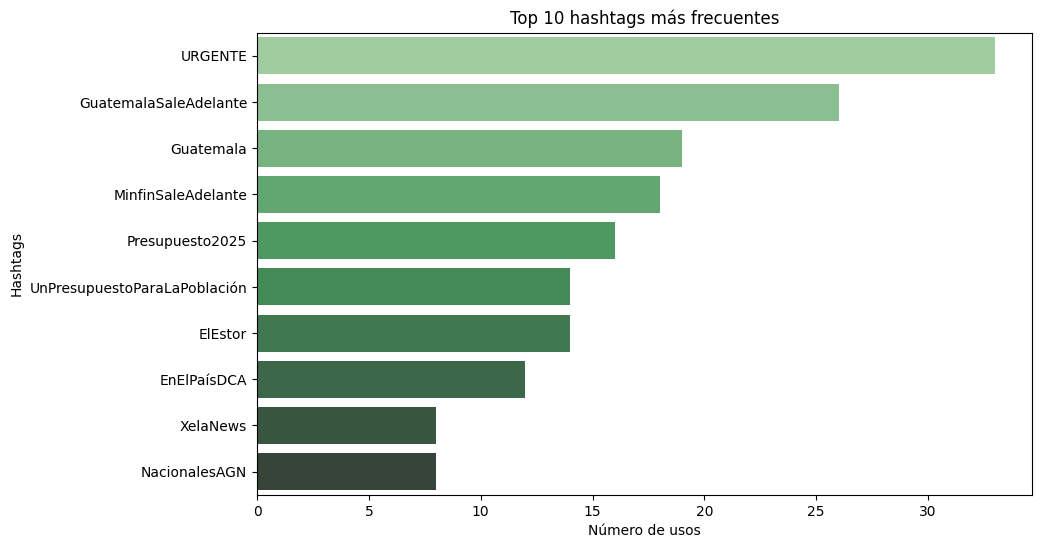

In [55]:
topHashtags = hashtagCounts.most_common(10)
hashtagLabels, hashtagValues = zip(*topHashtags)

plt.figure(figsize=(10, 6))
sns.barplot(x=hashtagValues, y=hashtagLabels, palette="Greens_d")
plt.title('Top 10 hashtags más frecuentes')
plt.xlabel('Número de usos')
plt.ylabel('Hashtags')
plt.show()

##### Word Cloud

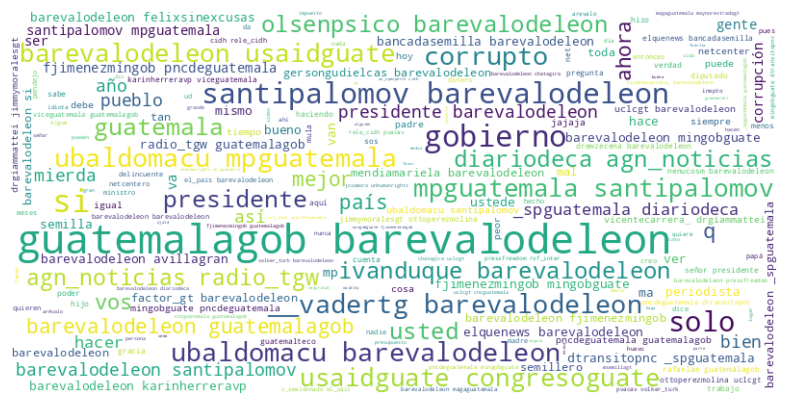

In [56]:
text = ' '.join(bernydf['rawContent'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Interacciones en ambas cuentas

In [57]:
interactions = pd.read_csv("interactions.csv", index_col=0)

In [58]:
interactions.head()

,user,mentionedUsers,retweetCount,hashtags
0,la_revoluzzion,"['usembassyguate', '48cantonestoto', 'usaidgua...",0,[]
1,xelanewsgt,[],80,"['URGENTE', 'faferos', 'BernardoArévalo', 'Neb..."
2,m24095273,"['ivanduque', 'barevalodeleon']",0,[]
3,carlosalbesc,"['ivanduque', 'barevalodeleon']",0,[]
4,brenda_agn,"['barevalodeleon', 'karinherreravp', 'agn_noti...",0,[]


In [59]:
interactions.describe(include='all')

,user,mentionedUsers,retweetCount,hashtags
count,10987,10987,10987.000000,10987
unique,4291,2870,NaN,423
top,traficogt,[],NaN,[]
freq,781,1324,NaN,10305
mean,NaN,NaN,26.307090,NaN
std,NaN,NaN,229.112527,NaN
min,NaN,NaN,0.000000,NaN
25%,NaN,NaN,0.000000,NaN
50%,NaN,NaN,0.000000,NaN
75%,NaN,NaN,0.000000,NaN


##### Número total de tweets, usuarios únicos y hashtags

In [60]:
lenTweets = len(interactions)

uniques = interactions['user'].nunique()

hashtagsFlattened = [hashtag for hashtags in interactions['hashtags'] for hashtag in eval(hashtags)]
uniqueHashtags = len(set(hashtagsFlattened))

print(f"Total de tweets: {lenTweets}")
print(f"Usuarios únicos: {uniques}")
print(f"Hashtags únicos: {uniqueHashtags}")


Total de tweets: 10987
Usuarios únicos: 4291
Hashtags únicos: 524


##### Menciones más comunes

In [61]:
interactions['mentionedUsers'] = interactions['mentionedUsers'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

allMentions = [mention for mentions in interactions['mentionedUsers'] for mention in mentions]
mentionCounts = Counter(allMentions)

print("Top 10 menciones más frecuentes:")
print(mentionCounts.most_common(10))


Top 10 menciones más frecuentes:
[('barevalodeleon', 5601), ('traficogt', 4244), ('guatemalagob', 1013), ('mpguatemala', 617), ('ubaldomacu', 587), ('santipalomov', 547), ('fjimenezmingob', 452), ('mingobguate', 340), ('drgiammattei', 339), ('congresoguate', 329)]


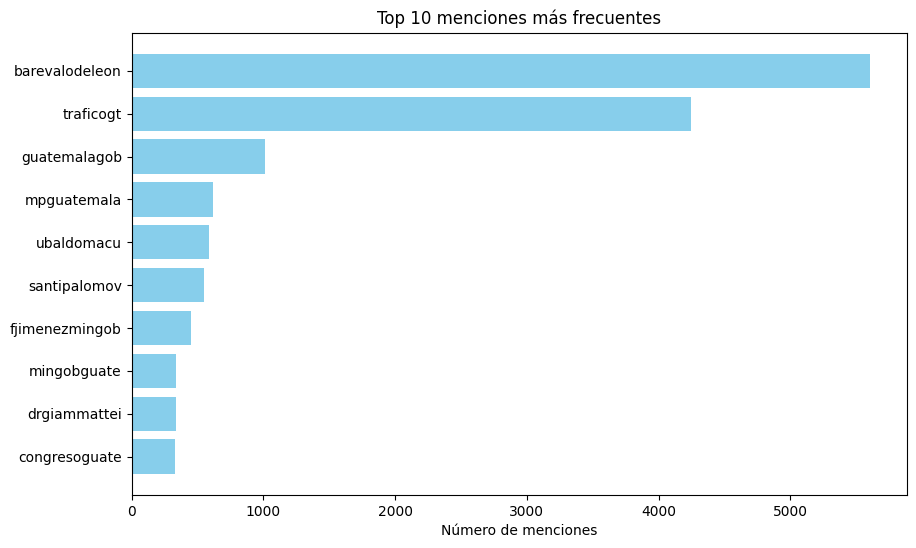

In [62]:
topMentions = mentionCounts.most_common(10)
names, counts = zip(*topMentions)

plt.figure(figsize=(10, 6))
plt.barh(names, counts, color='skyblue')
plt.xlabel('Número de menciones')
plt.title('Top 10 menciones más frecuentes')
plt.gca().invert_yaxis()
plt.show()

##### Hashtags más comunes

In [63]:
interactions['hashtags'] = interactions['hashtags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

allHashtags = [hashtag for hashtags in interactions['hashtags'] for hashtag in hashtags]
hashtagCounts = Counter(allHashtags)

print("Top 10 hashtags más frecuentes:")
print(hashtagCounts.most_common(10))


Top 10 hashtags más frecuentes:
[('URGENTE', 43), ('Guatemala', 35), ('GuatemalaSaleAdelante', 26), ('AHORA', 23), ('MinfinSaleAdelante', 18), ('AhoraLH', 18), ('Presupuesto2025', 16), ('UnPresupuestoParaLaPoblación', 14), ('ElEstor', 14), ('TraficoGT', 13)]


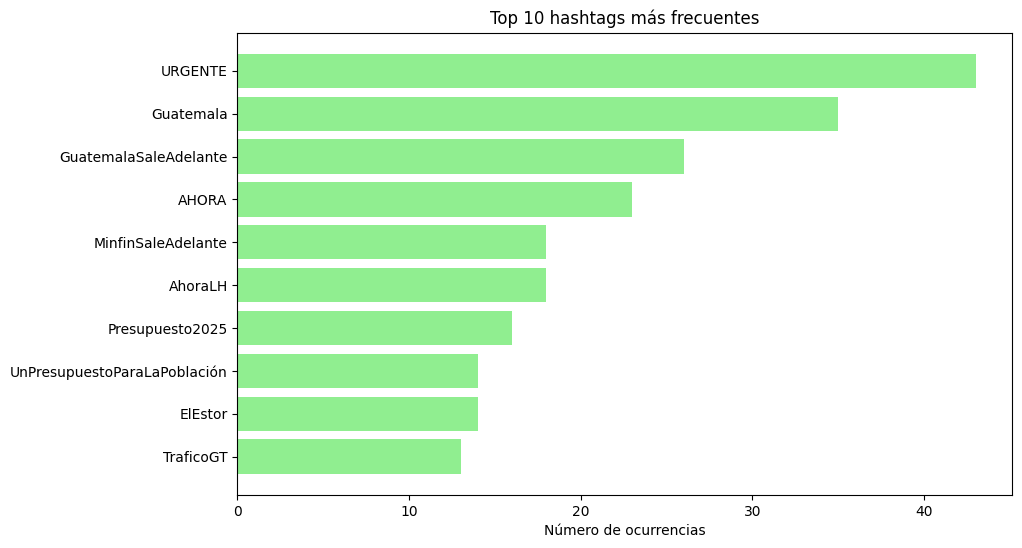

In [64]:
topHashtags = hashtagCounts.most_common(10)
hashNames, hashCounts = zip(*topHashtags)

plt.figure(figsize=(10, 6))
plt.barh(hashNames, hashCounts, color='lightgreen')
plt.xlabel('Número de ocurrencias')
plt.title('Top 10 hashtags más frecuentes')
plt.gca().invert_yaxis()
plt.show()

##### Word Cloud

In [65]:
allHashtags = [hashtag for hashtags in interactions['hashtags'] for hashtag in hashtags]

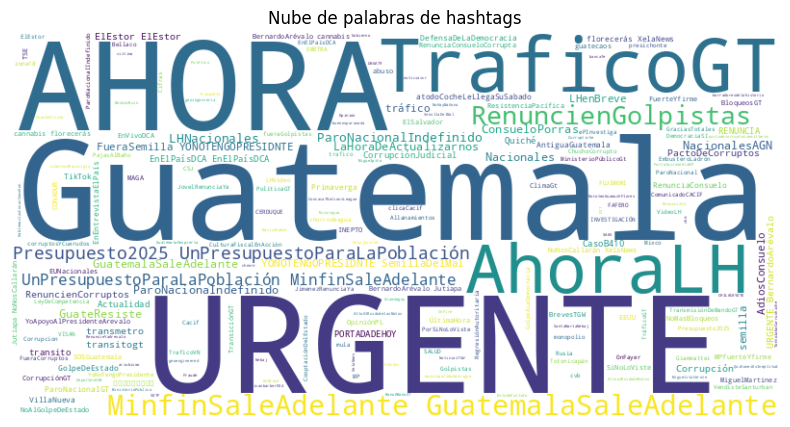

In [66]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(allHashtags))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras de hashtags")
plt.show()

##### ¿Qué usuarios están más involucrados en conversaciones sobre eventos políticos y cómo interactúan entre ellos?

In [67]:
keywords = ['elecciones', 'gobierno', 'protesta', 'política', 'BernardoArévalo']

tweets = interactions[
    interactions['hashtags'].apply(lambda x: any(keyword in x for keyword in keywords)) |
    interactions['user'].str.contains('|'.join(keywords), case=False)
]


In [68]:
userInteractions = []

for _, row in tweets.iterrows():
    user = row['user']
    mentioned_users = row['mentionedUsers']
    for mentioned_user in mentioned_users:
        userInteractions.append((user, mentioned_user))

interactiondf = pd.DataFrame(userInteractions, columns=['user', 'mentioned_user'])
interactionCounts = interactiondf.groupby(['user', 'mentioned_user']).size().reset_index(name='counts')

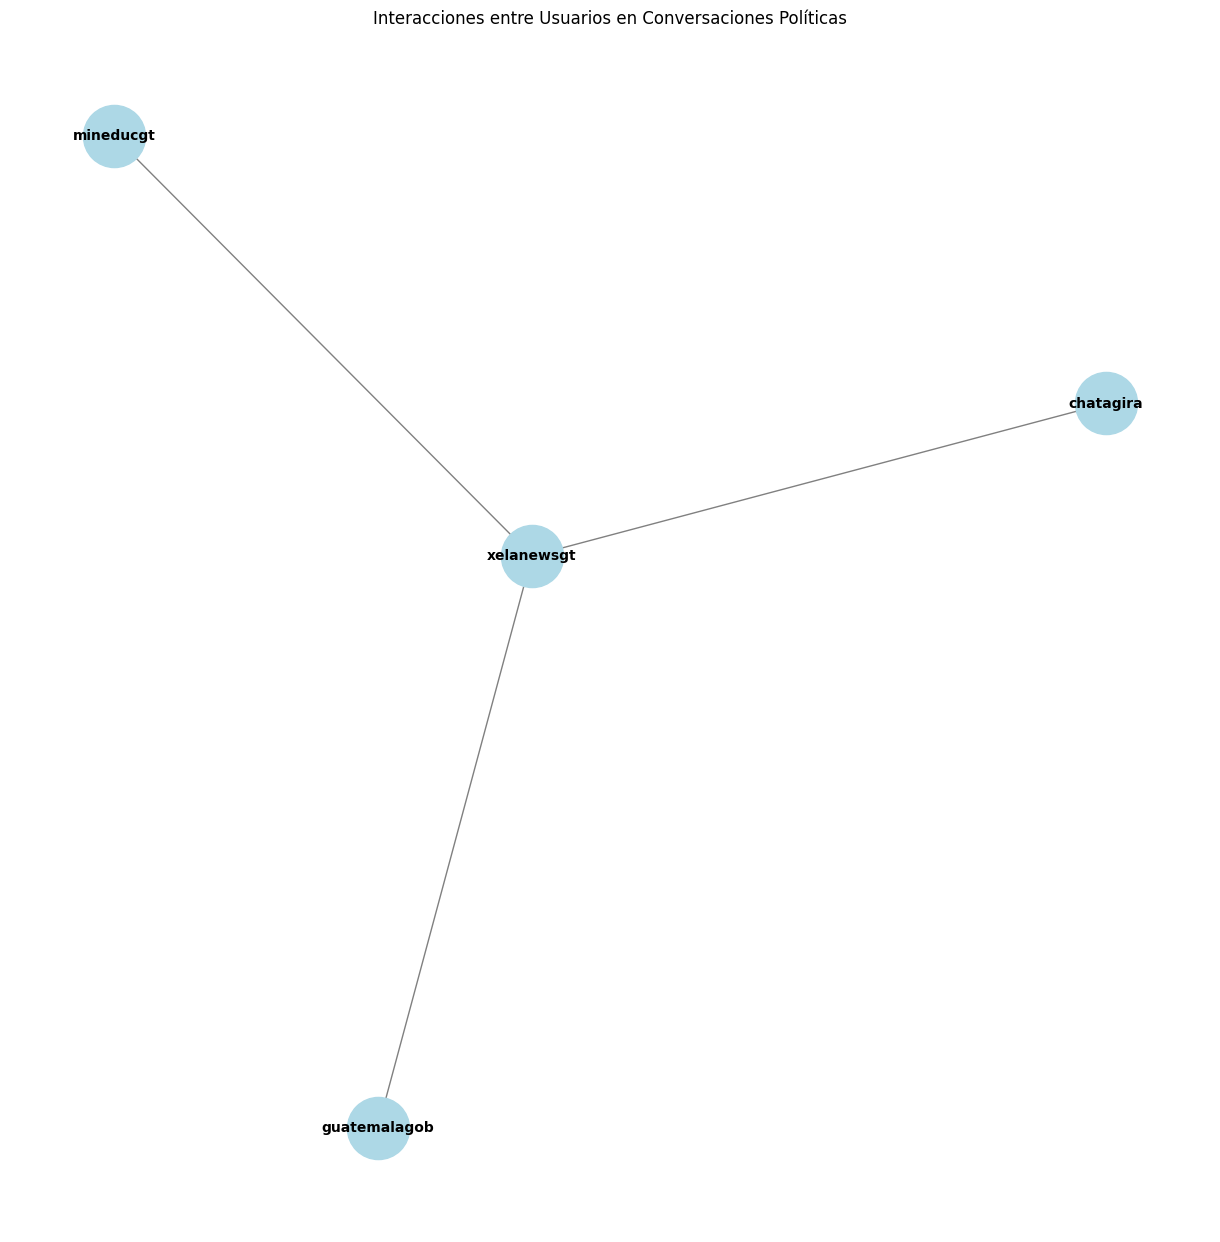

In [69]:
graph = nx.from_pandas_edgelist(interactionCounts, 'user', 'mentioned_user', ['counts'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph)  # Layout para el grafo
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title('Interacciones entre Usuarios en Conversaciones Políticas')
plt.show()


# Analisis de sentimiento

In [71]:
from textblob import TextBlob
from googletrans import Translator

# Inicializar el traductor
translator = Translator()

# Función para obtener el sentimiento
def get_sentiment(text):
    if text is None or text.strip() == "":
        return 0  # O un valor predeterminado
    try:
        translated_text = translator.translate(text, src='es', dest='en').text

        blob = TextBlob(translated_text)
        return blob.sentiment.polarity
    except Exception as e:
        print(f"Error al traducir o analizar el texto: {e} - Texto: {text}")
        return 0  # O un valor predeterminado

# Filtrar valores nulos o vacíos antes de aplicar la función
bernydf = bernydf[bernydf['rawContent'].notna() & (bernydf['rawContent'].str.strip() != "")]

# Aplicar la función a la columna 'rawContent'
bernydf['sentiment_score'] = bernydf['rawContent'].apply(get_sentiment)

# Clasificar el sentimiento basado en el puntaje
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Aplicar la clasificación
bernydf['sentiment'] = bernydf['sentiment_score'].apply(classify_sentiment)

# Visualizar los resultados
print(bernydf[['rawContent', 'sentiment_score', 'sentiment']].head())


                                          rawContent  sentiment_score  \
0  _ confirmado compañeres, impuesto usembassygua...         0.375000   
1  urgente medios faferos informaron ayer, acerca...         0.000000   
2  ivanduque barevalodeleon usaste pegasus espiar...         0.266667   
3  ivanduque barevalodeleon entienden bien, cuadr...         0.000000   
4  presidente barevalodeleon vicepresidenta karin...         0.000000   

  sentiment  
0  Positive  
1   Neutral  
2  Positive  
3   Neutral  
4   Neutral  


In [73]:
# Filtrar valores nulos o vacíos antes de aplicar la función
traficdf = traficdf[traficdf['rawContent'].notna() & (traficdf['rawContent'].str.strip() != "")]

# Aplicar la función a la columna 'rawContent'
traficdf['sentiment_score'] = traficdf['rawContent'].apply(get_sentiment)

# Clasificar el sentimiento basado en el puntaje
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Aplicar la clasificación
traficdf['sentiment'] = traficdf['sentiment_score'].apply(classify_sentiment)

# Visualizar los resultados
print(traficdf[['rawContent', 'sentiment_score', 'sentiment']].head())

                                          rawContent  sentiment_score  \
0  comprensible resolución... ruso sabe engrasar ...              0.0   
1  corrupción cc_guatemala descarada, falsificaci...             -0.4   
2  pncdeguatemala mingobguate fjimenezmingob dieg...              0.0   
3  amilcarmontejo aztecanoticiagt bancadasemilla ...              0.0   
4  soy_ aztecanoticiagt conapgt denunciaempagua m...             -0.6   

  sentiment  
0   Neutral  
1  Negative  
2   Neutral  
3   Neutral  
4  Negative  


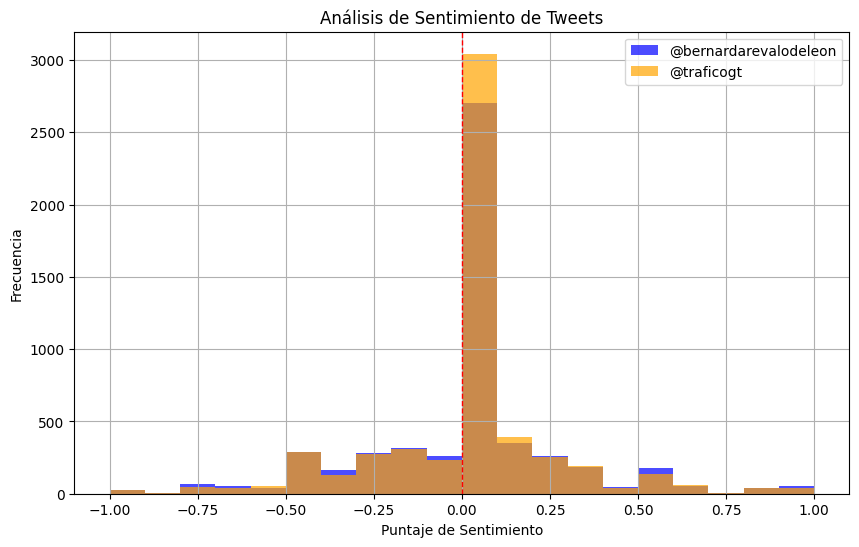

In [74]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Histograma del puntaje de sentimiento
plt.hist(bernydf['sentiment_score'], bins=20, alpha=0.7, label='@bernardarevalodeleon', color='blue')
plt.hist(traficdf['sentiment_score'], bins=20, alpha=0.7, label='@traficogt', color='orange')

# Añadir etiquetas y título
plt.title('Análisis de Sentimiento de Tweets')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Línea para indicar el puntaje neutral
plt.legend()

# Mostrar el gráfico
plt.grid()
plt.show()


In [76]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Función de preprocesamiento
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Eliminar enlaces
    text = re.sub(r'\@\w+|\#', '', text)  # Eliminar menciones y hashtags
    text = text.lower()  # Convertir a minúsculas
    tokens = word_tokenize(text)  # Tokenizar
    tokens = [word for word in tokens if word.isalnum()]  # Eliminar puntuación
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]  # Eliminar stopwords
    return tokens

# Aplicar preprocesamiento
bernydf['tokens'] = bernydf['rawContent'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [77]:
# Crear un diccionario
dictionary = corpora.Dictionary(bernydf['tokens'])

# Crear el corpus
corpus = [dictionary.doc2bow(tokens) for tokens in bernydf['tokens']]


In [78]:
from gensim.models import LdaModel

# Número de tópicos a identificar
num_topics = 5

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Imprimir los temas
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.073*"barevalodeleon" + 0.018*"ubaldomacu" + 0.016*"santipalomov" + 0.014*"mpguatemala" + 0.011*"guatemalagob"')
(1, '0.072*"barevalodeleon" + 0.009*"ubaldomacu" + 0.008*"si" + 0.008*"mpguatemala" + 0.008*"solo"')
(2, '0.037*"barevalodeleon" + 0.012*"presidente" + 0.008*"arévalo" + 0.005*"guatemala" + 0.004*"padre"')
(3, '0.050*"barevalodeleon" + 0.007*"q" + 0.006*"gobierno" + 0.005*"emisorasunidas" + 0.004*"guatemala"')
(4, '0.075*"barevalodeleon" + 0.033*"guatemalagob" + 0.025*"fjimenezmingob" + 0.017*"mingobguate" + 0.012*"diariodeca"')


In [79]:
def get_dominant_topic(text):
    bow = dictionary.doc2bow(text)
    topic_distribution = lda_model.get_document_topics(bow)
    return max(topic_distribution, key=lambda x: x[1])[0]

# Obtener el tema dominante para cada tweet
bernydf['dominant_topic'] = bernydf['tokens'].apply(get_dominant_topic)

# Agrupar por usuario para ver la distribución de temas
topic_distribution = bernydf.groupby(['user', 'dominant_topic']).size().reset_index(name='counts')
print(topic_distribution)


                                                   user  dominant_topic  \
0     {'id': 1001437196711350275, 'id_str': '1001437...               0   
1     {'id': 1002242560788611073, 'id_str': '1002242...               0   
2     {'id': 100295197, 'id_str': '100295197', 'url'...               4   
3     {'id': 1003259051638222848, 'id_str': '1003259...               0   
4     {'id': 1003259051638222848, 'id_str': '1003259...               1   
...                                                 ...             ...   
3815  {'id': 997480842632093696, 'id_str': '99748084...               4   
3816  {'id': 99799809, 'id_str': '99799809', 'url': ...               0   
3817  {'id': 998292166077231106, 'id_str': '99829216...               0   
3818  {'id': 99856163, 'id_str': '99856163', 'url': ...               4   
3819  {'id': 998591065799254016, 'id_str': '99859106...               1   

      counts  
0          1  
1          1  
2          2  
3          1  
4          1  
...      

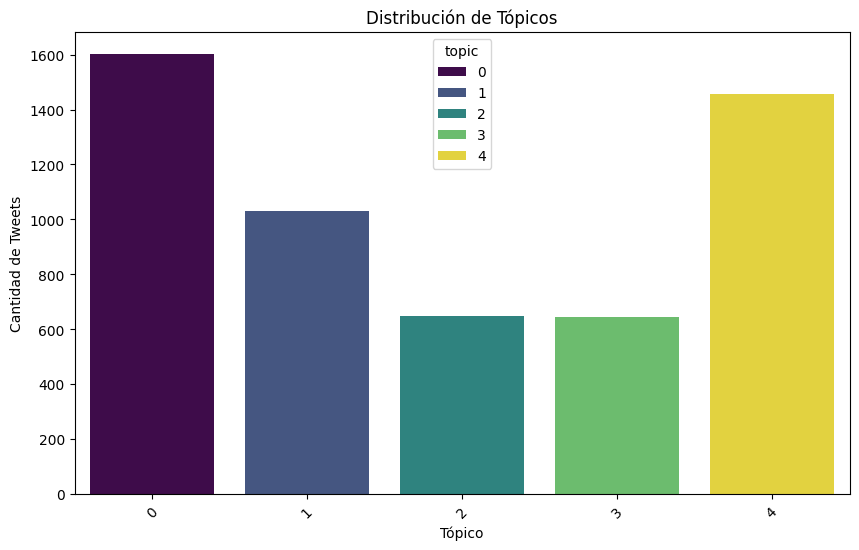

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada tema
topic_counts = bernydf['dominant_topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_counts, x='topic', y='count', palette='viridis', hue='topic')
plt.title('Distribución de Tópicos')
plt.xlabel('Tópico')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=45)
plt.show()


### ¿Cómo influyen los influencers y las comunidades en la formación de opiniones públicas?

Cuando figuras con grandes números de seguidores publican, retuitean o mencionan en redes sociales, sus mensajes llegan a audencias más amplias, lo cual incrementa el alcane y moldea las percepciones de la gente dependiendo del tipo de creador de contenido que se siga, admire, mire o escuche.

Dentro de los factores más importantes, se encuentran la credibilidad y la confianza que depositan los usuarios a las opiniones de los influencers, a quienes perciben como expertos en ciertas ramas. Al considerárseles de esa forma, sus mensajes reciben una mayor acpetación; además, la interacción con la que cuentan los influences, como también los temas que abordan y quiénes son sus seguidores, son temas de gran importancia y por los cuales sea crean comunidades o ecosistemas donde ciertas reglas, comportamientos o fuentes de pensamiento suelen surgir.

Pasando a los grupo o comunidades previamente mencionados, en cuanto a temas políticos se tiene un gran poder depositado en estos espacios o entornos digitales, en los que la interacción y la movilización son factores de alto valor. Estos grupos suelen apoyarse mutuamente al compartir contenido e ideas que se discuten con el tiempo, lo cual crea entornos de rebote de información, lo que expande su alcance. También, la comunidades logran movilizar masas con una causa, creencia o idea en común. Esto hace que el impacto social del mensaje que se defienda o apoye se amplifique.

Por otro lado, la opinión pública es tan importante como volátil, ya que los mensajes pueden llegar a volverse virales, lo cual hace que mucha gente los vea en poco tiempo. Este concepto de la viralización es de gran impacto en aspectos como capañas políticas o movilizaciones, donde la información que prevalezca, se mantiene como punto importante en la toma de decisiones. Sin embargo, el llegar a mucha gente también implica que surjan diferente puntos de vista al respecto, provocando polarización, y con ello el cierre a perspectivas alternativas, exacerbando divisiones políticas.

Finalmente, es de suma importancia que los influencers sean conscientes del impacto de sus mensajes. Es fundamental fomentar la educación mediática entre usuario para evitar la desinformación y mitigar la polarización.